* **Courses:** Fall 2022-IE 532-Analysis of Network Data-Section AN
* **Topic:** Mid. term
* **Version:** E
* **Student name:**  Chen Wang

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from gurobipy import *
from itertools import combinations
import heapq as hq
from random import sample
import pandas as pd
import math
import csv


plt.rcParams['figure.figsize'] = [6, 6] ## set the size of all figures

# Question 1_a
![1.a](Figures/Question_1.a.png)

# Question 1_b
![1.b_1](Figures/Question_1.b-1.png)
![1.b_2](Figures/Question_1.b-2.png)
![1.b_3](Figures/Question_1.b-3.png)

## Check by code:

Using a code to check the result. Define G and H, and H's weight is the reciprocals of corresponding weight in G. The result shows the G and H will have the same shortest path, which contradictions **"Every shortest path in H is a longest path in G"**.


The shortest path is: [1, 4], its length is: 2


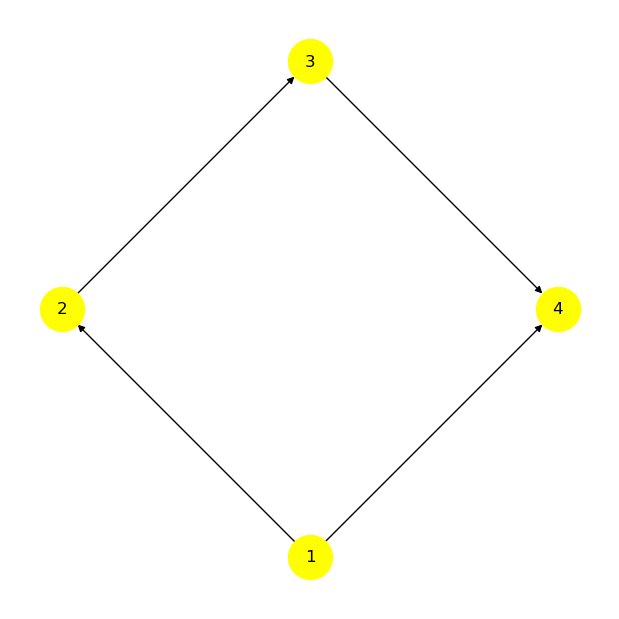

In [2]:
G=nx.DiGraph()
wij = [2, 2, 2, 2]
G.add_edge( 1,  2, weight= wij[0])
G.add_edge( 2,  3, weight= wij[1])
G.add_edge( 3,  4, weight= wij[2])
G.add_edge( 1,  4, weight= wij[3])

## We can also plot the network.
nx.draw_spectral(G, with_labels=True, node_size=1000, node_color='yellow')

length_G, path_G = nx.bidirectional_dijkstra(G, 1, 4, weight='weight')
print("The shortest path is: {}, its length is: {}".format(path_G, length_G))

The shortest path is: [1, 4], its length is: 0.5


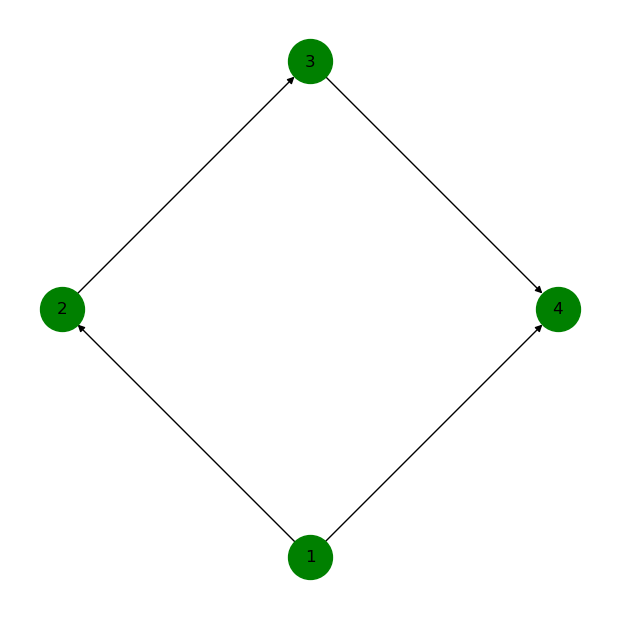

In [3]:
H=nx.DiGraph()
H.add_edge( 1,  2, weight= 1/wij[0])
H.add_edge( 2,  3, weight= 1/wij[1])
H.add_edge( 3,  4, weight= 1/wij[1])
H.add_edge( 1,  4, weight= 1/wij[1])

## We can also plot the network.
nx.draw_spectral(H, with_labels=True, node_size=1000, node_color='Green')

length_H, path_H = nx.bidirectional_dijkstra(H, 1, 4, weight='weight')
print("The shortest path is: {}, its length is: {}".format(path_H, length_H))

# Question 1_c
![1.c](Figures/Question_1.c.png)

# Question 1_d
I reference https://stackoverflow.com/questions/40734183/kruskals-algorithm-modify-to-matrix-data-structure to get the pseudo-code of Kruskal's Algorithm.
![1.d_1](Figures/Question_1.d-1.png)
![1.d_2](Figures/Question_1.d-2.png)

# Question 3.a & Question 3.b

### Preprocessing

In [4]:
import gurobipy as gp
from gurobipy import *
import random
import numpy as np
import pandas as pd
import random

import warnings
warnings.simplefilter("ignore")

In [5]:
airports=['LGA', 'JFK', 'DCA', 'CLT', 'ATL', 'MCO', 'ORD', 'DFW', 'DEN', 'PHX', 'LAS', 'LAX', 'SFO', 'SEA']
times={'LGA': {'LGA': 0, 'JFK': 0, 'DCA': 1, 'CLT': 2, 'ATL': 2, 'MCO': 3, 'ORD': 2, 'DFW': 3, 'DEN': 4, 'PHX': 4, 'LAS': 4, 'LAX': 5, 'SFO': 5, 'SEA': 5},
           'JFK': {'LGA': 0, 'JFK': 0, 'DCA': 1, 'CLT': 2, 'ATL': 2, 'MCO': 3, 'ORD': 2, 'DFW': 3, 'DEN': 4, 'PHX': 4, 'LAS': 4, 'LAX': 5, 'SFO': 5, 'SEA': 5},
           'DCA': {'LGA': 1, 'JFK': 1, 'DCA': 0, 'CLT': 2, 'ATL': 2, 'MCO': 3, 'ORD': 2, 'DFW': 2, 'DEN': 4, 'PHX': 4, 'LAS': 4, 'LAX': 5, 'SFO': 5, 'SEA': 5},
           'CLT': {'LGA': 2, 'JFK': 2, 'DCA': 1, 'CLT': 0, 'ATL': 1, 'MCO': 1, 'ORD': 2, 'DFW': 2, 'DEN': 4, 'PHX': 4, 'LAS': 4, 'LAX': 5, 'SFO': 5, 'SEA': 5},
           'ATL': {'LGA': 2, 'JFK': 2, 'DCA': 1, 'CLT': 1, 'ATL': 0, 'MCO': 2, 'ORD': 3, 'DFW': 2, 'DEN': 4, 'PHX': 4, 'LAS': 4, 'LAX': 5, 'SFO': 5, 'SEA': 6},
           'MCO': {'LGA': 3, 'JFK': 3, 'DCA': 2, 'CLT': 1, 'ATL': 1, 'MCO': 0, 'ORD': 3, 'DFW': 2, 'DEN': 4, 'PHX': 4, 'LAS': 4, 'LAX': 5, 'SFO': 5, 'SEA': 6},
           'ORD': {'LGA': 2, 'JFK': 2, 'DCA': 2, 'CLT': 2, 'ATL': 3, 'MCO': 3, 'ORD': 0, 'DFW': 2, 'DEN': 3, 'PHX': 3, 'LAS': 3, 'LAX': 4, 'SFO': 4, 'SEA': 4},
           'DFW': {'LGA': 3, 'JFK': 3, 'DCA': 2, 'CLT': 2, 'ATL': 2, 'MCO': 2, 'ORD': 2, 'DFW': 0, 'DEN': 2, 'PHX': 2, 'LAS': 2, 'LAX': 3, 'SFO': 3, 'SEA': 4},
           'DEN': {'LGA': 4, 'JFK': 4, 'DCA': 4, 'CLT': 4, 'ATL': 4, 'MCO': 4, 'ORD': 3, 'DFW': 2, 'DEN': 0, 'PHX': 1, 'LAS': 1, 'LAX': 2, 'SFO': 2, 'SEA': 3},
           'PHX': {'LGA': 4, 'JFK': 4, 'DCA': 4, 'CLT': 4, 'ATL': 4, 'MCO': 4, 'ORD': 3, 'DFW': 2, 'DEN': 1, 'PHX': 0, 'LAS': 1, 'LAX': 1, 'SFO': 1, 'SEA': 3},
           'LAS': {'LGA': 4, 'JFK': 4, 'DCA': 4, 'CLT': 4, 'ATL': 4, 'MCO': 4, 'ORD': 3, 'DFW': 2, 'DEN': 1, 'PHX': 1, 'LAS': 0, 'LAX': 1, 'SFO': 1, 'SEA': 2},
           'LAX': {'LGA': 5, 'JFK': 5, 'DCA': 5, 'CLT': 5, 'ATL': 5, 'MCO': 3, 'ORD': 4, 'DFW': 3, 'DEN': 4, 'PHX': 1, 'LAS': 1, 'LAX': 0, 'SFO': 1, 'SEA': 2},
           'SFO': {'LGA': 5, 'JFK': 5, 'DCA': 5, 'CLT': 5, 'ATL': 5, 'MCO': 5, 'ORD': 4, 'DFW': 3, 'DEN': 4, 'PHX': 1, 'LAS': 1, 'LAX': 1, 'SFO': 0, 'SEA': 1},
           'SEA': {'LGA': 5, 'JFK': 5, 'DCA': 5, 'CLT': 5, 'ATL': 6, 'MCO': 6, 'ORD': 2, 'DFW': 3, 'DEN': 4, 'PHX': 2, 'LAS': 1, 'LAX': 2, 'SFO': 1, 'SEA': 0}}

In [6]:
numFlights=50 # change this

origins=[random.choice(airports) for i in range(numFlights)]
destinations=[]
takeoff_times=np.round(np.random.uniform(0, 18, numFlights),2)
landing_times=[]
for i in range(numFlights):
    while True:
        destination=random.choice(airports)
        if destination!=origins[i]:
            destinations.append(destination)
            break

for i in range(numFlights):
    landing_times.append(np.round(takeoff_times[i]+times[origins[i]][destinations[i]],2))

print("#\t Origin\t Dest\t Start\t End")
print("-"*50)
for i in range(numFlights):
    print(i+1, "\t", origins[i], "\t", destinations[i], "\t", takeoff_times[i], "\t", landing_times[i])
    

#	 Origin	 Dest	 Start	 End
--------------------------------------------------
1 	 SEA 	 LAX 	 15.15 	 17.15
2 	 MCO 	 LGA 	 17.15 	 20.15
3 	 DEN 	 DFW 	 3.46 	 5.46
4 	 PHX 	 LGA 	 14.68 	 18.68
5 	 MCO 	 ATL 	 12.25 	 13.25
6 	 LAX 	 PHX 	 5.76 	 6.76
7 	 LAS 	 SEA 	 4.6 	 6.6
8 	 MCO 	 PHX 	 13.71 	 17.71
9 	 MCO 	 SFO 	 12.03 	 17.03
10 	 CLT 	 SFO 	 3.76 	 8.76
11 	 DCA 	 LGA 	 2.63 	 3.63
12 	 DFW 	 LAS 	 8.84 	 10.84
13 	 ATL 	 PHX 	 1.51 	 5.51
14 	 DCA 	 PHX 	 14.75 	 18.75
15 	 LAS 	 DFW 	 3.38 	 5.38
16 	 SFO 	 LAS 	 2.18 	 3.18
17 	 ATL 	 MCO 	 16.18 	 18.18
18 	 DEN 	 MCO 	 7.85 	 11.85
19 	 LGA 	 ATL 	 9.21 	 11.21
20 	 LAS 	 PHX 	 14.44 	 15.44
21 	 CLT 	 LGA 	 2.84 	 4.84
22 	 LGA 	 CLT 	 17.69 	 19.69
23 	 JFK 	 SFO 	 7.63 	 12.63
24 	 CLT 	 ORD 	 12.53 	 14.53
25 	 DEN 	 JFK 	 3.47 	 7.47
26 	 DCA 	 JFK 	 2.29 	 3.29
27 	 LGA 	 SEA 	 6.2 	 11.2
28 	 CLT 	 JFK 	 1.71 	 3.71
29 	 DFW 	 PHX 	 9.54 	 11.54
30 	 LAS 	 CLT 	 18.0 	 22.0
31 	 MCO 	 LAX 	 4.26 	 9.26
32 	 DC

### Method1:
Using for loop to solve the problem:


In [7]:
## 1. Combine origins, destinations, takeoff_times, landing_times to a list
combination = list(zip(origins, destinations, takeoff_times, landing_times))
combination

[('SEA', 'LAX', 15.15, 17.15),
 ('MCO', 'LGA', 17.15, 20.15),
 ('DEN', 'DFW', 3.46, 5.46),
 ('PHX', 'LGA', 14.68, 18.68),
 ('MCO', 'ATL', 12.25, 13.25),
 ('LAX', 'PHX', 5.76, 6.76),
 ('LAS', 'SEA', 4.6, 6.6),
 ('MCO', 'PHX', 13.71, 17.71),
 ('MCO', 'SFO', 12.03, 17.03),
 ('CLT', 'SFO', 3.76, 8.76),
 ('DCA', 'LGA', 2.63, 3.63),
 ('DFW', 'LAS', 8.84, 10.84),
 ('ATL', 'PHX', 1.51, 5.51),
 ('DCA', 'PHX', 14.75, 18.75),
 ('LAS', 'DFW', 3.38, 5.38),
 ('SFO', 'LAS', 2.18, 3.18),
 ('ATL', 'MCO', 16.18, 18.18),
 ('DEN', 'MCO', 7.85, 11.85),
 ('LGA', 'ATL', 9.21, 11.21),
 ('LAS', 'PHX', 14.44, 15.44),
 ('CLT', 'LGA', 2.84, 4.84),
 ('LGA', 'CLT', 17.69, 19.69),
 ('JFK', 'SFO', 7.63, 12.63),
 ('CLT', 'ORD', 12.53, 14.53),
 ('DEN', 'JFK', 3.47, 7.47),
 ('DCA', 'JFK', 2.29, 3.29),
 ('LGA', 'SEA', 6.2, 11.2),
 ('CLT', 'JFK', 1.71, 3.71),
 ('DFW', 'PHX', 9.54, 11.54),
 ('LAS', 'CLT', 18.0, 22.0),
 ('MCO', 'LAX', 4.26, 9.26),
 ('DCA', 'MCO', 9.02, 12.02),
 ('ORD', 'DEN', 5.81, 8.81),
 ('JFK', 'DEN', 6.

In [8]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

## 1. Combine origins, destinations, takeoff_times, landing_times to a list
combination = list(zip(origins, destinations, takeoff_times, landing_times))
combination

## 2. Turn to Dataframe form
df = pd.DataFrame(combination, columns = ["origins", "destinations", "takeoff_times", "landing_times"])
df_ = df.sort_values(by=["takeoff_times"])

## 3. Separate two dataframe, ones includes the Starting airport and its takeoff_times, define a new column in 
## "compensation" to record if crews leaves the airport or arrives in the airport
df1 = df_.iloc[:,[0,2]]
df1["compensation"] = 1
df2 = df_.iloc[:,[1,3]]
df2["compensation"] = -1

In [9]:
## 4. Rename the "origins" column, the "destinations" column to be the "airport" column, for the future use
##    Rename the "takeoff_times" column, the "landing_times" column to be the "time" column, for the future use
df3 = df1.rename(columns={"origins": "airport", "takeoff_times": "time"})
df4 = df2.rename(columns={"destinations": "airport", "landing_times": "time"})

## 5. merge to let "airport" columns combine, "time" column combine
df5 = pd.concat([df3,df4])

## 6. Sort and follow the ascending order
df5.sort_values(by=["time"],inplace=True, ignore_index=True)
df5

## 7. Create a new duplication copy
compute = {}
for i in airports:
    compute[i] = 0

compute2 = compute.copy()

In [10]:
## The rule is the following: 
## a. When crews takes off from the airport, the airport(compute2) will remain computer[airport] - x1 (x1 = 1 here) crews
## b. When the airport lands this airport, the airport(compute2) will remain computer[airport] - x2 (x2 = -1 here) crews
## c. When this airport takes off a flight, but there has no crew in this airport(computer2[airport] ==0), 
##    Compensating x3 crews (at this question x3 = 1) to the original airport crew number (compute[airport] += x3)
## The compute dictionary is the final distribution of crews in each airport
for i in range(df5.shape[0]):
    if df5["compensation"][i] > 0:
        if compute2[df5["airport"][i]] - df5["compensation"][i] < 0:
            compute[df5["airport"][i]] += df5["compensation"][i]- compute2[df5["airport"][i]]
            compute2[df5["airport"][i]] = 0
        else: 
            compute2[df5["airport"][i]] = compute2[df5["airport"][i]] - df5["compensation"][i]
    else:
        compute2[df5["airport"][i]] -= df5["compensation"][i]
        
print("The overall crews should be {} people".format(np.sum(list(compute.values()))))
print("-"*50)
print("Crews distribution in different airports")
print(compute)

The overall crews should be 28 people
--------------------------------------------------
Crews distribution in different airports
{'LGA': 2, 'JFK': 1, 'DCA': 4, 'CLT': 5, 'ATL': 1, 'MCO': 3, 'ORD': 2, 'DFW': 0, 'DEN': 3, 'PHX': 0, 'LAS': 4, 'LAX': 2, 'SFO': 1, 'SEA': 0}


### Method2: Using Gurobi

In [11]:
## Original primal solution:
## Objection function:
##                           min (xij*wieghtij) = obj
##                     s.t to xij always >=0
m = Model('fights')
x = {}
for i in range(len(airports)):
    x[airports[i]] = m.addVar(vtype=GRB.INTEGER, name= airports[i])

    
for i in range(df5.shape[0]):
    x[df5["airport"][i]] -= df5["compensation"][i] 
    m.addConstr(x[df5["airport"][i]] >= 0, name='c('+str(i)+')')
        
crew_number = np.sum(list(x.values()))
m.setObjective(crew_number, GRB.MINIMIZE)
m.optimize()

Set parameter Username


GurobiError: Version number is 10.0, license is for version 9.0

In [1173]:
print("We should have at least {} crews".format(int(m.ObjVal)))
print("-"*50)
print("There distribution is in:")
for i in range(len(m.X)):
    if m.X[i]>0:
        print("\033[91m\033[1m{}: {} crew(s).\033[0m".format(list(x.keys())[i], int(m.X[i])))
    else:
        print("{}: {} crew(s). ".format(list(x.keys())[i], int(m.X[i])))

We should have at least 31 crews
--------------------------------------------------
There distribution is in:
LGA: 0 crew(s). 
JFK: 1 crew(s).
DCA: 3 crew(s).
CLT: 3 crew(s).
ATL: 3 crew(s).
MCO: 1 crew(s).
ORD: 4 crew(s).
DFW: 4 crew(s).
DEN: 1 crew(s).
PHX: 1 crew(s).
LAS: 0 crew(s). 
LAX: 3 crew(s).
SFO: 4 crew(s).
SEA: 3 crew(s).


# Question 3.c

### Data preprocessing treatment
Data announcement:
1. Pick up k randomly route to be important flight, which should provide more crews 【in this case, set k = 3】
2. Crews number in specific flight 【in this case, crews = 2】

In [1174]:
k = 3
crews = 2
random_index = [random.randint(0, df.shape[0]) for i in range(k)]

important_flight = df.iloc[random_index,:]

print("The below flights should dispath {} crews".format(crews))
important_flight

The below flights should dispath 2 crews


,origins,destinations,takeoff_times,landing_times
16,DCA,ORD,11.02,13.02
38,SFO,DCA,4.68,9.68
35,CLT,LAS,17.55,21.55


In [1175]:
for i in important_flight.values:
    for j in range(df5.shape[0]):
        if i[0] == df5.iloc[j,0] and i[2] == df5.iloc[j,1]:
            df5.iloc[j,2] = crews
            
for i in important_flight.values:
    for j in range(df5.shape[0]):
        if i[1] == df5.iloc[j,0] and i[3] == df5.iloc[j,1]:
            df5.iloc[j,2] = -crews      

In [1176]:
## 7. Create a new duplication copy
compute = {}
for i in airports:
    compute[i] = 0

compute2 = compute.copy()

for i in range(df5.shape[0]):
    if df5["compensation"][i] > 0:
        if compute2[df5["airport"][i]] - df5["compensation"][i] < 0:
            compute[df5["airport"][i]] += df5["compensation"][i]- compute2[df5["airport"][i]]
            compute2[df5["airport"][i]] = 0
        else: 
            compute2[df5["airport"][i]] = compute2[df5["airport"][i]] - df5["compensation"][i]
    else:
        compute2[df5["airport"][i]] -= df5["compensation"][i]

        
print("The overall crews should be {} people".format(np.sum(list(compute.values()))))
print("-"*50)
print("Crews distribution in different airports")
print(compute)

The overall crews should be 33 people
--------------------------------------------------
Crews distribution in different airports
{'LGA': 0, 'JFK': 1, 'DCA': 3, 'CLT': 4, 'ATL': 3, 'MCO': 1, 'ORD': 4, 'DFW': 4, 'DEN': 1, 'PHX': 1, 'LAS': 0, 'LAX': 3, 'SFO': 5, 'SEA': 3}


### Method2: Using Gurobi

In [1177]:
## Original primal solution:
## Objection function:
##                           min (xij*wieghtij) = obj
##                     s.t to xij always >=0
m_2 = Model('fights')
x = {}
for i in range(len(airports)):
    x[airports[i]] = m_2.addVar(vtype=GRB.INTEGER, name= airports[i])

    
for i in range(df5.shape[0]):
    x[df5["airport"][i]] -= df5["compensation"][i]
    m_2.addConstr(x[df5["airport"][i]] >= 0, name='c('+str(i)+')')
        
crew_number = np.sum(list(x.values()))
m_2.setObjective(crew_number, GRB.MINIMIZE)
m_2.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 100 rows, 14 columns and 100 nonzeros
Model fingerprint: 0xd30b956c
Variable types: 0 continuous, 14 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 8e+00]
Found heuristic solution: objective 33.0000000
Presolve removed 100 rows and 14 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 33 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.300000000000e+01, best bound 3.300000000000e+01, gap 0.0000%


In [1178]:
print("We should have at least {} crews".format(int(m_2.ObjVal)))
print("-"*50)
print("There distribution is in:")
for i in range(len(m_2.X)):
    if m_2.X[i]>0:
        print("\033[91m\033[1m{}: {} crew(s).\033[0m".format(list(x.keys())[i], int(m_2.X[i])))
    else:
        print("{}: {} crew(s). ".format(list(x.keys())[i], int(m_2.X[i])))

We should have at least 33 crews
--------------------------------------------------
There distribution is in:
LGA: 0 crew(s). 
JFK: 1 crew(s).
DCA: 3 crew(s).
CLT: 4 crew(s).
ATL: 3 crew(s).
MCO: 1 crew(s).
ORD: 4 crew(s).
DFW: 4 crew(s).
DEN: 1 crew(s).
PHX: 1 crew(s).
LAS: 0 crew(s). 
LAX: 3 crew(s).
SFO: 5 crew(s).
SEA: 3 crew(s).


We can see the equation in 3.b and in 3.c are equal. In actual, there are only different from each other some edges, whihc have different weights. However, the results changes(of course).

The method1 and the method2 can get the same result.

In [1179]:
## I can use this to check each constraint if there has something wrong.
m_2.display()

Minimize
<gurobi.LinExpr: LGA + JFK + DCA + CLT + ATL + MCO + ORD + DFW + DEN + PHX + LAS + LAX
+ SFO + SEA>
Subject To
  c(0): <gurobi.LinExpr: ORD> >= 1
  c(1): <gurobi.LinExpr: ORD> >= 2
  c(2): <gurobi.LinExpr: LAX> >= 1
  c(3): <gurobi.LinExpr: DCA> >= 1
  c(4): <gurobi.LinExpr: LAX> >= 2
  c(5): <gurobi.LinExpr: PHX> >= 1
  c(6): <gurobi.LinExpr: DCA> >= 2
  c(7): <gurobi.LinExpr: DCA> >= 1
  c(8): <gurobi.LinExpr: LGA> >= -1
  c(9): <gurobi.LinExpr: JFK> >= 1
  c(10): <gurobi.LinExpr: LGA> >= -2
  c(11): <gurobi.LinExpr: DFW> >= -1
  c(12): <gurobi.LinExpr: SFO> >= 1
  c(13): <gurobi.LinExpr: ATL> >= 1
  c(14): <gurobi.LinExpr: ATL> >= 2
  c(15): <gurobi.LinExpr: ORD> >= 3
  c(16): <gurobi.LinExpr: DCA> >= 2
  c(17): <gurobi.LinExpr: ORD> >= 4
  c(18): <gurobi.LinExpr: MCO> >= 1
  c(19): <gurobi.LinExpr: ORD> >= 3
  c(20): <gurobi.LinExpr: SFO> >= 3
  c(21): <gurobi.LinExpr: LGA> >= -3
  c(22): <gurobi.LinExpr: JFK> >= 0
  c(23): <gurobi.LinExpr: DEN> >= 1
  c(24): <gurobi.LinEx

# Question 5.a

In [1180]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from gurobipy import *
from random import sample
import numpy as np
from scipy import *

plt.rcParams['figure.figsize'] = [8, 8] ## set the size of all figures

### Method 1: nx.shortest_path

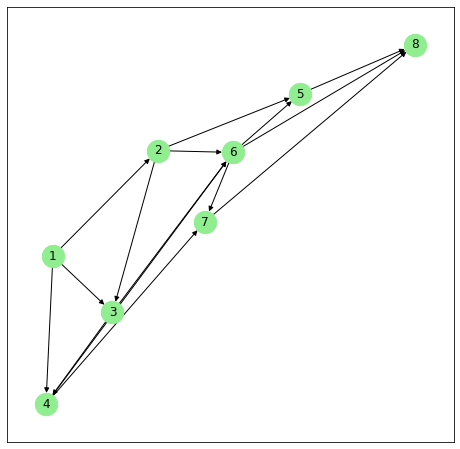

In [1181]:
G=nx.DiGraph()

G.add_edge( 1,  2, weight= 8)
G.add_edge( 1,  3, weight= 7)
G.add_edge( 1,  4, weight= 4)
G.add_edge( 2,  3, weight= 2)
G.add_edge( 3,  4, weight= 5)
G.add_edge( 2,  6, weight= 9)
G.add_edge( 3,  6, weight= 6)
G.add_edge( 4,  6, weight= 1)
G.add_edge( 2,  5, weight= 3)
G.add_edge( 4,  7, weight= 2)
G.add_edge( 6,  5, weight= 3)
G.add_edge( 6,  7, weight= 4)
G.add_edge( 5,  8, weight= 9)
G.add_edge( 6,  8, weight= 5)
G.add_edge( 7,  8, weight= 8)

## We can also plot the graph.
nx.draw_networkx(G, with_labels=True, node_size=500, node_color='lightgreen')

In [1182]:
length, path = nx.bidirectional_dijkstra(G, 1, 8)
print("The shortest cost is: {}.".format(length))
print("The shortest path is: {}.".format(path))

The shortest cost is: 10.
The shortest path is: [1, 4, 6, 8].


### Method 2: LP_1

In [1183]:
model_5a=Model("question5.a_LP")

## define variables at each edges: x[i,j]
## All the file I copy from the lagrangian_ not include_HW.ipynb in the 0920's handout
x={}
for (i,j,d) in G.edges(data=True):
    x[i,j]=model_5a.addVar(vtype=GRB.BINARY, obj=d['weight'], name='x('+str(i)+','+str(j)+')') ## give 1 or 0 only
    
    
## Define source, terminal, weight
source = 1
terminal = 8

## Define a input and output flow at edge node
inc={}
out={}
for i in G.nodes():
    inc[i]=0 ## define the start value is 0
    out[i]=0 ## define the end value is 0
    
for (i,j) in G.edges():
    inc[j]+=x[i,j] ## the output flow of the previous nodes combination is the input flow of the node
    out[i]+=x[i,j] ## the output flow of the node 
    

    
for i in G.nodes(): 
    if i==source:
        model_5a.addConstr(out[i]-inc[i]==1) ## the source node has a flow equals to 1 (only an input flow)
    elif i==terminal:
        model_5a.addConstr(out[i]-inc[i]==-1) ## the terminal node has a flow equals to -1 (only an output flow)
    else:
        model_5a.addConstr(out[i]-inc[i]==0) ## all nodes in the middle will have a balanced flow = 0
        
model_5a.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 8 rows, 15 columns and 30 nonzeros
Model fingerprint: 0x0c51122e
Variable types: 0 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 14.0000000
Presolve removed 8 rows and 15 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 10 14 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+01, best bound 1.000000000000e+01, gap 0.0000%


In [1184]:
for (i,j,d) in G.edges(data=True):
    if x[i,j].X==1:
        print("(%s,%s): %2.1f"% (i,j,d['weight']))

(1,4): 4.0
(4,6): 1.0
(6,8): 5.0


# Question 5.b
There are two new side constraints:
1. Each arc that is traversed provides you with a "prize": the total amount of prizes you collect has to be bigger than or equal to a threshold P;
2. Each arc that is traversed costs you a "cost": the total cost you can pay is restricted by your total budget C.

In [1185]:
total_prizes = 50 ## threshold P
total_costs = 20 ## budget C

## Define source, terminal, weight
source = 1
terminal = 5

In [1186]:
model_5b=Model("question5.a_LP")

H=nx.DiGraph()

H.add_edge( 1,  2, weight= 15, prize = 15, cost = 2)
H.add_edge( 1,  3, weight= 20, prize = 20, cost = 5)
H.add_edge( 1,  4, weight= 25, prize = 25, cost = 3)
H.add_edge( 2,  3, weight= 20, prize = 20, cost = 4)
H.add_edge( 3,  4, weight= 20, prize = 20, cost = 5)
H.add_edge( 2,  5, weight=  5, prize =  5, cost = 7)
H.add_edge( 3,  5, weight= 10, prize = 10, cost = 5)
H.add_edge( 4,  5, weight= 15, prize = 15, cost = 2)

In [1187]:
## define variables at each edges: x[i,j]
x={}
for (i,j,d) in H.edges(data=True):
    x[i,j]=model_5b.addVar(vtype=GRB.BINARY, obj=d['weight'], name='x('+str(i)+','+str(j)+')') 

In [1188]:
## Define a input and output flow at edge node
inc={}
out={}
for i in H.nodes():
    inc[i]=0 ## define the start value is 0
    out[i]=0 ## define the end value is 0
    
for (i,j) in H.edges():
    inc[j]+=x[i,j] ## the output flow of the previous nodes combination is the input flow of the node
    out[i]+=x[i,j] ## the output flow of the node 
    

    
for i in H.nodes(): 
    if i==source:
        model_5b.addConstr(out[i]-inc[i]==1) ## the source node has a flow equals to 1 (only an input flow)
    elif i==terminal:
        model_5b.addConstr(out[i]-inc[i]==-1) ## the terminal node has a flow equals to -1 (only an output flow)
    else:
        model_5b.addConstr(out[i]-inc[i]==0) ## all nodes in the middle will have a balanced flow = 0

In [1189]:
## Define two constraints: 
## 1. Each arc that is traversed provides you with a "prize": the total amount of prizes you collect has to be 
##    bigger than or equal to a threshold P;
## 2. Each arc that is traversed costs you a "cost": the total cost you can pay is restricted by your total budget C.
## 3. P and C was determined by me

constrain_prize =quicksum(x[i,j]*d["prize"] for (i,j,d) in H.edges(data = True))
constrain_costs =quicksum(x[i,j]*d["cost"] for (i,j,d) in H.edges(data = True))

model_5b.addConstr(constrain_prize >= total_prizes, name = "total_prizes")
model_5b.addConstr(constrain_costs <= total_costs, name = "total_costs")


model_5b.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7 rows, 8 columns and 32 nonzeros
Model fingerprint: 0xc65355f6
Variable types: 0 continuous, 8 integer (8 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [5e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Presolve removed 7 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 55 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.500000000000e+01, best bound 5.500000000000e+01, gap 0.0000%


In [1190]:
print("(%s,%s): %s %s %s"% ("i","j","weight", "prize", "cost"))
for (i,j,d) in H.edges(data=True):
    if x[i,j].X==1:
        print("(%s,%s): %5.1f %5.1f %5.1f"% (i,j,d['weight'], d["prize"], d['cost']))
print("The shortest path length is {}".format(np.sum([x[i,j].X*d["weight"] for (i,j,d) in H.edges(data=True)])))

(i,j): weight prize cost
(1,3):  20.0  20.0   5.0
(3,4):  20.0  20.0   5.0
(4,5):  15.0  15.0   2.0
The shortest path length is 55.0


# Question 5.c

In [1191]:
## define plot parameter, I plan to plot iteration VS. lamb, iteration VS. the shortest weight
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

In [1192]:
## define iteration variables
tau=1
alpha=0.999
lamb=100
prevlamb=lamb
iteration=1

total_prizes = 50 ## threshold P (set here to modify it directly)
total_costs = 20 ## budget C (set here to modify it directly)


## Reset the edges
H=nx.DiGraph()
H.add_edge( 1,  2, weight= 15, prize = 15, cost = 2)
H.add_edge( 1,  3, weight= 20, prize = 20, cost = 5)
H.add_edge( 1,  4, weight= 25, prize = 25, cost = 3)
H.add_edge( 2,  3, weight= 20, prize = 20, cost = 4)
H.add_edge( 3,  4, weight= 20, prize = 20, cost = 5)
H.add_edge( 2,  5, weight=  5, prize =  5, cost = 7)
H.add_edge( 3,  5, weight= 10, prize = 10, cost = 5)
H.add_edge( 4,  5, weight= 15, prize = 15, cost = 2)

In [1193]:
record_lamb = []
record_obj = []
record_iteration = []
x_2={}

done=False
while(not done):
    
    ## Most of the equation is similar to 5.b, but starts to diverge after the objective function
    model=Model("Lagrangian_optimization")
    model.Params.LogToConsole = 0   
    

    for (i,j,d) in H.edges(data=True):
        x_2[i,j]=model.addVar(vtype=GRB.BINARY, name='x_2('+str(i)+','+str(j)+')') 
    

    inc={}
    out={}
    for i in H.nodes():
        inc[i]=0 
        out[i]=0 
        
    for (i,j) in H.edges():
        inc[j]+=x_2[i,j]
        out[i]+=x_2[i,j]


    for i in H.nodes(): 
        if i==source:
            model.addConstr(out[i]-inc[i]==1)
        elif i==terminal:
            model.addConstr(out[i]-inc[i]==-1)
        else:
            model.addConstr(out[i]-inc[i]==0)
            
    constrain_prize =quicksum(x_2[i,j]*d["prize"] for (i,j,d) in H.edges(data = True))
    model.addConstr(constrain_prize >= total_prizes, name = "total_prizes")
    
    
    
    ## Original primal solution:
    ## Objection function:
    ##                           min (xij*wieghtij) = obj
    ##                     s.t to summary(xij*costij) <= C
    ##                            summary(xij*prizesij) >= P
    ##                            xij = [0,1]
    ##
    ## Lagrangian relaxation: 
    ##                            min obj + lamb*(Ax-b)
    ##                     s.t to summary(xij*prizesij) >= P
    ##                            xij = [0,1]
    ## Do iteration until the data converge:
    ## lamb = lamb + diff(obj)*learning rate = lamb + s*tau*alpha (tau = initiation learning rate)
    ## Finally feedback lamb, the shortest weight path
    
    obj = 0
    for (i,j,d) in H.edges(data = True):
        obj +=x_2[i,j]*(d["weight"] + lamb*d['cost'])
    obj -= total_costs*lamb

    model.setObjective(obj, GRB.MINIMIZE)
    model.optimize()
    

    record_obj.append(obj.getValue())
    record_lamb.append(lamb)
    record_iteration.append(iteration)
    
    ## objective function = obj + lamb*(Ax-b)
    ## diff(objective_function) = Ax-b = s
    s=0
    for (i,j,d) in H.edges(data = True):
        s += x_2[(i,j)].X*d["cost"] 
    s = s -total_costs
    if s>0:
        print("\033[91m\033[1mError happened, no path can meet the demand. It can not find a primal solution\033[0m")
        break

    ## The next iteration, update the lastest tau and lamb(>=0)
    lamb = lamb+s*tau
    tau = tau*alpha
    if lamb<0:
        lamb=0
    iteration+=1
    
    ## stopping condition
    if (iteration ==100) or (abs(s*tau)<0.001): 
        done=True
        record_lamb.append(lamb)
        record_iteration.append(iteration)

Therefore, the optimal solution finally converges to 55, and its thresholds and cost, which is **20+20+15=55 > P(>=50)**, and the cost **5+5+2=12 < C(<=20)**. 

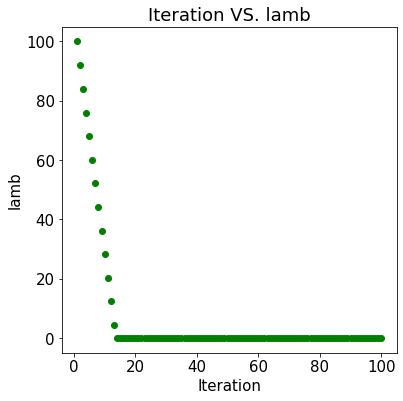

In [1194]:
plt.figure(figsize=(6, 6))
plt.plot(record_iteration, record_lamb, 'go')
title=[]
title.append("Iteration VS. lamb")
plt.title("\n".join(title))
plt.xlabel("Iteration")
plt.ylabel("lamb")
plt.show()
plt.close()

The shortest path leng is 55.0


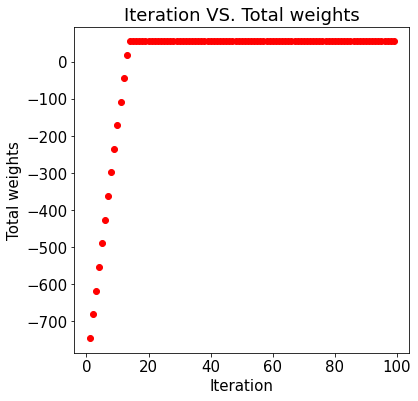

In [1195]:
print("The shortest path leng is {}".format(record_obj[-1]))
plt.figure(figsize=(6, 6))
plt.plot(record_iteration[0:-1], record_obj, 'ro')
title=[]
title.append("Iteration VS. Total weights")
plt.title("\n".join(title))
plt.xlabel("Iteration")
plt.ylabel("Total weights")
plt.show()
plt.close()

The result tells us that we can ignore the cost condition if we set the upper bond of total cost to C(<=20); actual, if we count it by hand, we can understand that the total cost of every path from 1 to 5 will end up with a values lower than C. 

# Question 6.a

In [1196]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from gurobipy import *
from random import sample
import numpy as np
import random

plt.rcParams['figure.figsize'] = [10, 10] ## set the size of all figures

In [1197]:
G=nx.read_weighted_edgelist("WV.txt")
for (i,j,d) in G.edges(data=True):
    print(i,j,d['weight'])

155392497 155347563 54484.0
155347563 155356150 26945.0
155347563 154841150 29265.0
155356150 2551970749 16629.0
155356150 2687232852 61.0
154841150 4591252183 292.0
154841150 4591252414 47.0
154766929 154766950 966.0
154766929 946822032 9164.0
154766950 154763442 11669.0
154763442 154763456 366.0
154763442 154763472 825.0
154833326 946821908 9126.0
154833326 154764571 1030.0
946821908 946821532 975.0
946821908 155873362 467.0
946821532 155873362 525.0
946821532 946821055 1166.0
155873362 155873346 175.0
155873362 9611789845 412.0
155229680 3411750149 49.0
155229680 155397660 1264.0
155229680 946397334 358.0
155229680 3411750163 236.0
155229680 8681173829 70.0
3411750149 3411750156 51.0
3411750149 8680019607 37.0
155397660 155319470 211.0
155397660 8680019589 115.0
155397660 1358764547 306.0
3411750156 3431031765 25.0
3411750156 8680019607 29.0
8680019607 8680019589 1245.0
8680019607 946397312 333.0
8680019607 3352369633 742.0
155319470 155389092 195.0
155319470 8678068768 419.0
155319

712817487 712886005 14284.0
712817487 712817458 1163.0
712886005 712886022 877.0
712886005 712886014 453.0
708348273 708407668 9055.0
708348273 708348262 860.0
708407668 8246252036 834.0
708407668 708407690 331.0
8246252036 708431237 9289.0
708348403 708348316 907.0
708348316 708412187 3943.0
708412187 708348357 659.0
708412187 708412129 198.0
708348442 708348622 10.0
708348442 154627308 21666.0
708348442 708348461 560.0
708348622 708348601 431.0
154627308 705819062 167.0
154627308 705819061 168.0
708348461 708348765 2944.0
708348461 708348601 396.0
705819062 705819125 11.0
705819062 705819061 11.0
708348765 708412168 552.0
708348765 708412156 145.0
708348388 705855708 9238.0
708348388 708348381 457.0
705855708 705855986 1018.0
705855708 705855738 446.0
708431237 708431269 450.0
708431237 708431741 286.0
708407432 708407449 312.0
708407432 708431369 9164.0
708431269 712799978 12683.0
708431269 708431295 372.0
712799978 712799944 870.0
712799944 712817458 9108.0
708431357 708431369 362.

3500161720 3500161712 39.0
155293141 155300775 116.0
155293141 155280480 372.0
155293141 155286893 196.0
154927429 3500161718 23.0
154927429 3500161712 33.0
3500161718 3500161712 44.0
3500161718 7907156255 782.0
3500161712 705764639 24076.0
7907156255 7907156252 58.0
7907156255 7907156241 60.0
705764639 705764626 279.0
705764639 705764622 119.0
705764639 705764643 310.0
155195711 155210744 1626.0
155210744 2014875914 10215.0
155210744 2013600116 37.0
2014875914 654567639 9.0
2014875914 2014875765 87.0
2014875914 2014875973 162.0
155280480 4024926860 2510.0
155280480 155300775 429.0
4024926860 4024926856 68.0
155300775 155300774 195.0
4024926856 4248953864 4061.0
155300774 155286893 114.0
155300774 155310736 176.0
155312281 155308520 18412.0
155312281 1700643403 369.0
155308520 155308523 177.0
155308520 155312139 165.0
1700643403 7684909106 3979.0
155308523 155312139 199.0
155308523 3941084727 35020.0
155312139 154656523 34002.0
7684909106 704316758 105.0
7684909106 704316759 101.0
7043

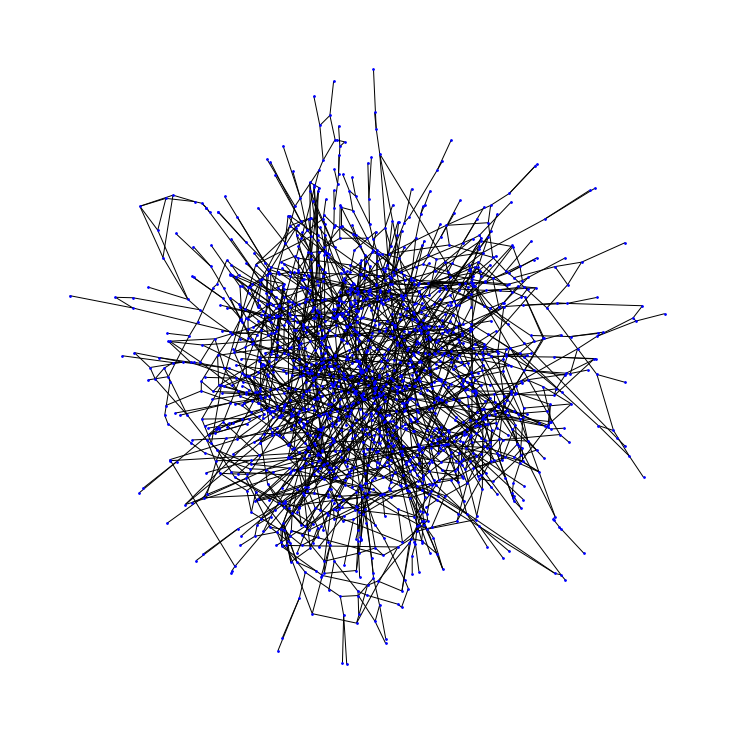

In [1198]:
# Drawing the graph G
pos=nx.spring_layout(G)
nx.draw(G, node_color='b', node_size=3)

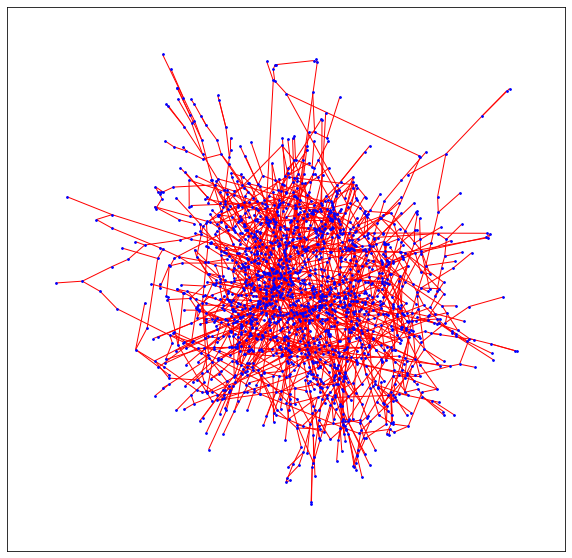

In [1199]:
## plot a MST T
T=nx.minimum_spanning_tree(G)
ered=[(i,j) for (i,j) in T.edges()] # selecting the edges in the tree (so that we can edit them in the plot)

pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(), node_color='b', node_size=3)
nx.draw_networkx_edges(G,pos,edgelist=ered, edge_color='r', width=1)

In [1200]:
## Randomly pick up a node to be a shelter
shelter=random.sample(list(T.nodes()), k = 1)

In [1201]:
T = T.to_directed()
totalCost_2=np.sum([nx.shortest_path_length(T, str(i), shelter[0], weight='weight') for i in T.nodes()])
avgCost_2=totalCost_2/(T.number_of_nodes()-1)
maxCost_2=np.max([nx.shortest_path_length(T, str(i), shelter[0], weight='weight') for i in T.nodes()])

print("Shelter:", shelter)
print("The overall shortest path time is:", totalCost_2)
print("The average time is:", avgCost_2)

Shelter: ['2404339041']
The overall shortest path time is: 448824890.0
The average time is: 236846.90765171504


# Question 6.b

In [1202]:
G = G.to_directed()

## Randomly pick up k nodes to be shelters
shelter2=random.sample(list(T.nodes()), k = 3)
shelter2

['6373182421', '155278474', '3352369633']

In [1203]:
def shortest_cost_shelter(G, n):
    shortest_cost = 0
    number = 0
    for i in G.nodes():
        if i not in shelter2:
            cost = []
            for j in shelter2:
                local_cost = nx.shortest_path_length(T, str(i), str(j), weight='weight')
                cost.append(local_cost)
            shortest_cost += min(cost)
            number += 1
    return shortest_cost, number, shortest_cost/number

In [1204]:
TotalCost_2, unimportant_nodes, AverageCost = shortest_cost_shelter(G, shelter2)
print("Shelters:", shelter2)
print("The overall shortest path time is:", TotalCost_2)
print("The average time is:", AverageCost)

Shelters: ['6373182421', '155278474', '3352369633']
The overall shortest path time is: 200988811.0
The average time is: 106174.75488642366


# Question 6.c

In [1205]:
# copy to a new path H from G
H = G.to_directed()

In [1206]:
def calculate_shortest_path(H, n):
    cost = 0
    number = 0
    terminal=n[0]
    
    for k in H.nodes():
        if k not in terminal:
            model=Model("shortest_path")
            model.Params.LogToConsole = 0
            x={}

            source=k

            for (i,j,d) in H.edges(data=True):
                x[i,j]=model.addVar(vtype=GRB.BINARY, name='x('+str(i)+','+str(j)+')')

            inc={}
            out={}
            for i in H.nodes():
                inc[i]=0 
                out[i]=0 

            for (i,j) in H.edges():
                inc[j]+=x[i,j] 
                out[i]+=x[i,j] 



            for i in H.nodes(): 
                if i==source:
                    model.addConstr(out[i]-inc[i]==1) 
                elif i==terminal:
                    model.addConstr(out[i]-inc[i]==-1) 
                else:
                    model.addConstr(out[i]-inc[i]==0) 

            obj = 0
            for (i,j,d) in H.edges(data = True):
                obj +=x[i,j]*d["weight"]

            model.setObjective(obj, GRB.MINIMIZE)

            model.optimize()

            cost += obj.getValue()
            number += 1
    return cost, number, cost/number

In [1207]:
TotalCost, nodes, Average_cost =  calculate_shortest_path(H, shelter)
print("Shelters:", shelter)
print("The overall shortest path time is:", TotalCost)
print("The average time is:", Average_cost)

Shelters: ['2404339041']
The overall shortest path time is: 364650198.0
The average time is: 192427.5451187335


We can see that the average time in 6.c is smaller than in 6.a (I use the same node as a shelter). That is because the MST did not mean the shortest path to the shelter is in this network. Therefore, the overall time to the shelter in MST tree will be obviously more than or equal to the shortest path in G.